In [1]:
from pprint import pprint

import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
volcano_data = load_dataset("easytpp/volcano")
taobao_data = load_dataset("easytpp/taobao")
retweet_data = load_dataset("easytpp/retweet")
stackoverflow_data = load_dataset("easytpp/stackoverflow")
taxi_data = load_dataset("easytpp/taxi")
amazon_data = load_dataset("easytpp/amazon")
earthquake_data = load_dataset("easytpp/earthquake")

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/513k [00:00<?, ?B/s]

test.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/39.2M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/3.88M [00:00<?, ?B/s]

test.json:   0%|          | 0.00/3.93M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/3.38M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/963k [00:00<?, ?B/s]

test.json:   0%|          | 0.00/990k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1401 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/401 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/401 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/327k [00:00<?, ?B/s]

test.json:   0%|          | 0.00/654k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1400 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/200 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/12.8M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

test.json:   0%|          | 0.00/3.72M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6454 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/922 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1851 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/2.38M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/319k [00:00<?, ?B/s]

test.json:   0%|          | 0.00/715k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/400 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/900 [00:00<?, ? examples/s]

In [ ]:
volcano_data["train"][0]

[0.0,
 0.000287030644439987,
 0.0028780640297509158,
 0.0032814584476824464,
 0.006841530338119367,
 0.010728080413828008,
 0.011496081327451647,
 0.02172833591998634,
 0.02243427615305984,
 0.022783367478049973,
 0.023822883865411634,
 0.024055611414652473,
 0.025172703653266248,
 0.03245788569517867,
 0.03274491633961866,
 0.03366031136588004,
 0.03548334383756732,
 0.0356384955378138,
 0.037081406343107,
 0.03786492242743261,
 0.038423468545610615,
 0.041355835668302934,
 0.04390032354376569,
 0.04906994384020506,
 0.04949661101418956,
 0.05066800634574475,
 0.050947279404833755,
 0.05325128214570469,
 0.05634655855399448,
 0.05664910436687869,
 0.06927845271998066,
 0.07048863597603303,
 0.07244354739191383,
 0.07811434201481257,
 0.08418348127954065,
 0.08528317471541864,
 0.08585723600429863,
 0.086501115556822,
 0.08701311616740959,
 0.08719154062145128,
 0.08847929972875576,
 0.09563870412921317,
 0.0968411298021723,
 0.10127846841070796]

In [ ]:
def normalize_times_to_1(dataset):
    normalized_dataset = {}
    
    # Process each split separately
    for split in dataset.keys():
        # Find max time for this specific split
        all_times = []
        for example in dataset[split]:
            all_times.extend(example['time_since_start'])
        
        max_time = max(all_times)
        
        # Define normalization function for this split
        def normalize_example(example):
            return {
                'seq_len': example['seq_len'],
                'type_event': example['type_event'],
                'seq_idx': example['seq_idx'],
                'time_since_start': [time / max_time for time in example['time_since_start']],
                'time_since_last_event': [time / max_time for time in example['time_since_last_event']],
                'dim_process': example['dim_process']
            }
        
        # Apply normalization while preserving Dataset type
        normalized_dataset[split] = dataset[split].map(normalize_example)
    
    return normalized_dataset

volcano_data = normalize_times_to_1(volcano_data)
taobao_data = normalize_times_to_1(taobao_data)
retweet_data = normalize_times_to_1(retweet_data)
stackoverflow_data = normalize_times_to_1(stackoverflow_data)
taxi_data = normalize_times_to_1(taxi_data)
amazon_data = normalize_times_to_1(amazon_data)
earthquake_data = normalize_times_to_1(earthquake_data)

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/181 [00:00<?, ? examples/s]

Map:   0%|          | 0/1300 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1401 [00:00<?, ? examples/s]

Map:   0%|          | 0/401 [00:00<?, ? examples/s]

Map:   0%|          | 0/401 [00:00<?, ? examples/s]

Map:   0%|          | 0/1400 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/6454 [00:00<?, ? examples/s]

Map:   0%|          | 0/922 [00:00<?, ? examples/s]

Map:   0%|          | 0/1851 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/900 [00:00<?, ? examples/s]

In [5]:
def print_stats(dataset, split='test'):
   dataset = dataset[split]
   stats = {"num_sequences": len(dataset), "max_sequence_length": 0, "min_sequence_length": 1000000, "max_event_time": 0, "min_event_time": 1000000}
   seq_lengths = [len(seq['time_since_last_event']) for seq in dataset]
   times_since_last_event = [time for seq in dataset for time in seq['time_since_last_event']]
   min_delta_event_time = min(times_since_last_event)
   max_delta_event_time = max(times_since_last_event)
   min_seq_length = min(seq_lengths)
   max_seq_length = max(seq_lengths)
   avg_seq_length = sum(seq_lengths) / len(seq_lengths)
   avg_delta_event_time = sum(times_since_last_event) / len(times_since_last_event)
   stats["max_sequence_length"] = max_seq_length
   stats["min_sequence_length"] = min_seq_length
   stats["num_sequences"] = len(seq_lengths)
   stats["avg_sequence_length"] = avg_seq_length
   stats["max_event_time"] = max_delta_event_time
   stats["min_event_time"] = min_delta_event_time
   stats["avg_event_time"] = avg_delta_event_time
   encoutered_marks = set()
   for seq in dataset:
       for mark in seq['type_event']:
           if mark not in encoutered_marks:
               encoutered_marks.add(mark)
   stats["num_marks"] = len(encoutered_marks)
   pprint(stats)

# Dataset Stats Prints

## Volcano

In [ ]:
print_stats(volcano_data)

{'avg_event_time': 0.014686981982913445,
 'avg_sequence_length': 14.209944751381215,
 'max_event_time': 0.9038903804589812,
 'max_sequence_length': 121,
 'min_event_time': 0.0,
 'min_sequence_length': 1,
 'num_marks': 1,
 'num_sequences': 181}


## TaoBao

In [7]:
print_stats(taobao_data)

{'avg_event_time': 0.003979462753628984,
 'avg_sequence_length': 56.91,
 'max_event_time': 0.08722266420221508,
 'max_sequence_length': 64,
 'min_event_time': 0.0,
 'min_sequence_length': 32,
 'num_marks': 17,
 'num_sequences': 500}


## Retweet

In [8]:
print_stats(retweet_data)

{'avg_event_time': 0.004215946653557168,
 'avg_sequence_length': 109.2325,
 'max_event_time': 0.860236285580097,
 'max_sequence_length': 264,
 'min_event_time': 0.0,
 'min_sequence_length': 50,
 'num_marks': 3,
 'num_sequences': 2000}


## Stackoverflow

In [9]:
print_stats(stackoverflow_data)

{'avg_event_time': 0.013510163001317162,
 'avg_sequence_length': 66.12967581047381,
 'max_event_time': 0.2717740280160645,
 'max_sequence_length': 101,
 'min_event_time': 0.0,
 'min_sequence_length': 41,
 'num_marks': 21,
 'num_sequences': 401}


## Taxi

In [10]:
print_stats(taxi_data)

{'avg_event_time': 0.012640938078432947,
 'avg_sequence_length': 37.05,
 'max_event_time': 0.30762841601250773,
 'max_sequence_length': 38,
 'min_event_time': 0.0,
 'min_sequence_length': 36,
 'num_marks': 10,
 'num_sequences': 400}


## Amazon

In [11]:
print_stats(amazon_data)

{'avg_event_time': 0.007695015193331811,
 'avg_sequence_length': 45.40680713128039,
 'max_event_time': 0.012134090437262303,
 'max_sequence_length': 94,
 'min_event_time': 0.0,
 'min_sequence_length': 14,
 'num_marks': 16,
 'num_sequences': 1851}


## Earthquake

In [12]:
print_stats(earthquake_data)

{'avg_event_time': 0.015376594018476972,
 'avg_sequence_length': 16.386666666666667,
 'max_event_time': 0.41201607109624644,
 'max_sequence_length': 18,
 'min_event_time': 0.0,
 'min_sequence_length': 0,
 'num_marks': 7,
 'num_sequences': 900}


# Plots

In [13]:
def plot_stats(dataset, splits=["train", "validation", "test"]):
    # Extract the data for each split
    split_data = {split: dataset[split] for split in splits}

    # Create subplots
    fig, axes = plt.subplots(len(splits) + 1, 2, figsize=(20, 7 * len(splits)))

    for i, split in enumerate(splits):
        data = split_data[split]
        seq_len = data["seq_len"]
        time_since_last_event = data["time_since_last_event"]

        # Histogram of the seq_len
        axes[i, 0].hist(seq_len, bins=20, edgecolor="k")
        axes[i, 0].set_title(f"Histogram of Sequence Length ({split})")
        axes[i, 0].set_xlabel("Sequence Length")
        axes[i, 0].set_ylabel("Frequency")

        # Histogram of the time_since_last_event
        axes[i, 1].hist(time_since_last_event, bins=20, edgecolor="k")
        axes[i, 1].set_title(f"Histogram of Time Since Last Event ({split})")
        axes[i, 1].set_xlabel("Time Since Last Event")
        axes[i, 1].set_ylabel("Frequency")
        # axes[i, 0].set_xscale('log')

        # axes[i, 0].set_yscale('log')
        # axes[i, 1].set_xscale('log')
        axes[i, 1].set_yscale("log")

    plt.tight_layout()
    plt.show()

In [14]:
def plot_stats_per_event_type(dataset, splits=["train", "validation", "test"]):
    # Extract the data for each split
    split_data = {split: dataset[split] for split in splits}

    # Create subplots
    num_events = dataset["train"][0]["dim_process"]
    fig, axes = plt.subplots(len(splits) * num_events, 2, figsize=(20, 5 * len(splits) * num_events))

    for i, split in enumerate(splits):
        data = split_data[split]

        for event_type in range(num_events):
            print(f"Event Type {event_type} for split {split}")
            event_mask = [[d == event_type for d in x["type_event"]] for x in data]
            time_since_last_event = [[e for e, m in zip(d["time_since_last_event"], e_m) if m] for d, e_m in zip(data, event_mask)]
            seq_len = [len(x) for x in time_since_last_event]
            # Histogram of the seq_len
            axes[i * num_events + event_type, 0].hist(seq_len, bins=20, edgecolor="k", alpha=0.5, label=f"Event Type {event_type}")
            axes[i * num_events + event_type, 0].set_title(f"Histogram of Sequence Length ({split})")
            axes[i * num_events + event_type, 0].set_xlabel("Sequence Length")
            axes[i * num_events + event_type, 0].set_ylabel("Frequency")

            # Histogram of the time_since_last_event
            axes[i * num_events + event_type, 1].hist(
                time_since_last_event, bins=20, edgecolor="k", alpha=0.5, label=f"Event Type {event_type}"
            )
            axes[i * num_events + event_type, 1].set_title(f"Histogram of Time Since Last Event ({split})")
            axes[i * num_events + event_type, 1].set_xlabel("Time Since Last Event")
            axes[i * num_events + event_type, 1].set_ylabel("Frequency")

        axes[i * num_events + event_type, 0].legend()
        axes[i * num_events + event_type, 1].legend()
        axes[i * num_events + event_type, 1].set_yscale("log")

    plt.tight_layout()
    plt.show()

## Volcano

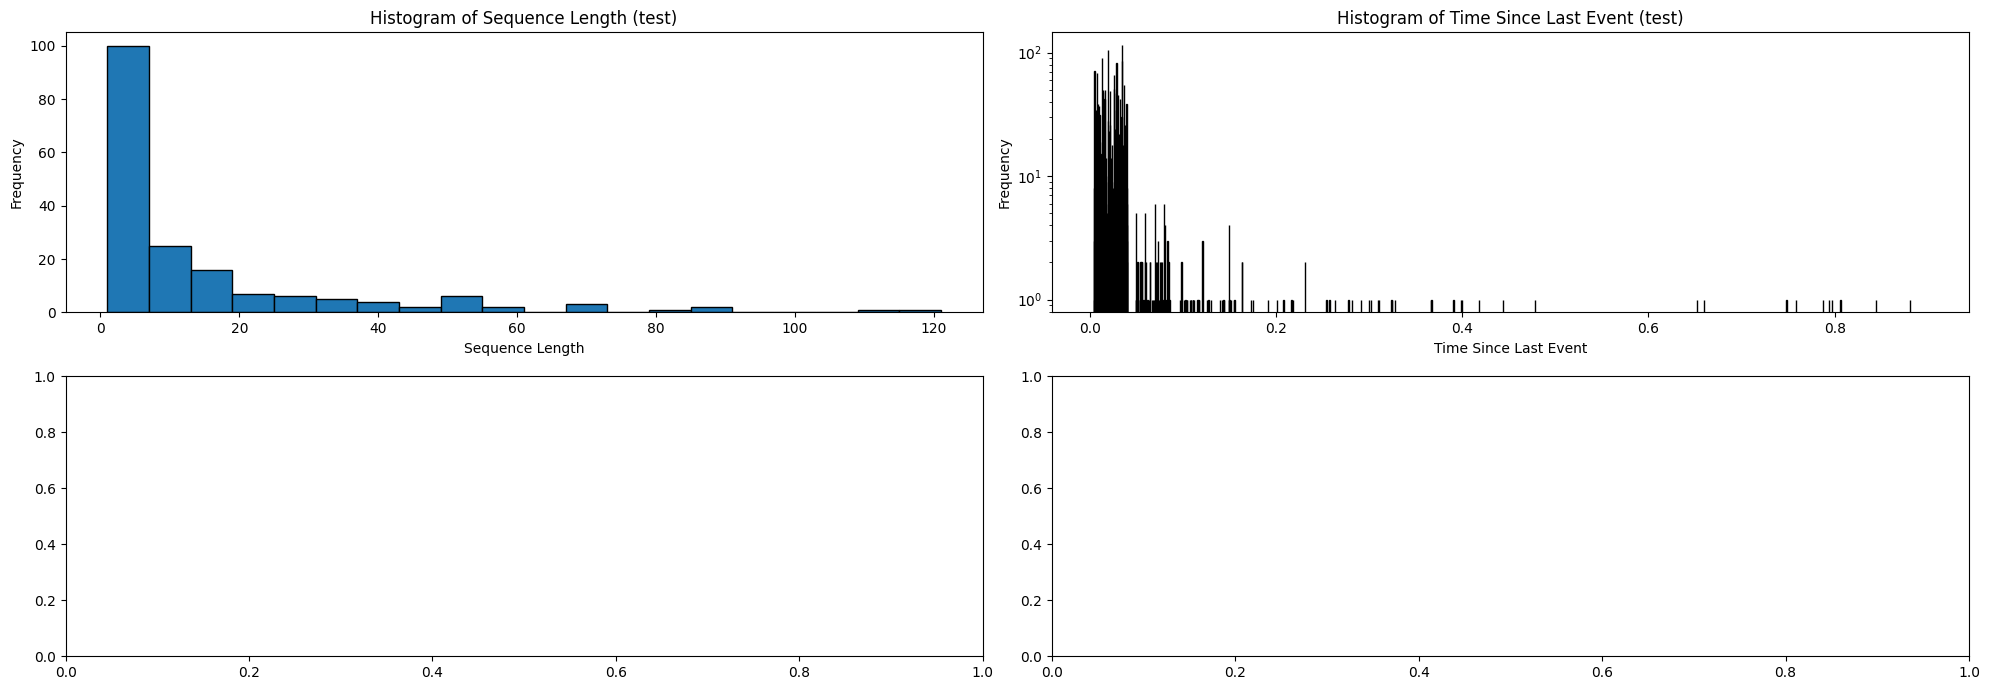

In [15]:
plot_stats(volcano_data, splits=["test"])

Event Type 0 for split train
Event Type 0 for split validation
Event Type 0 for split test


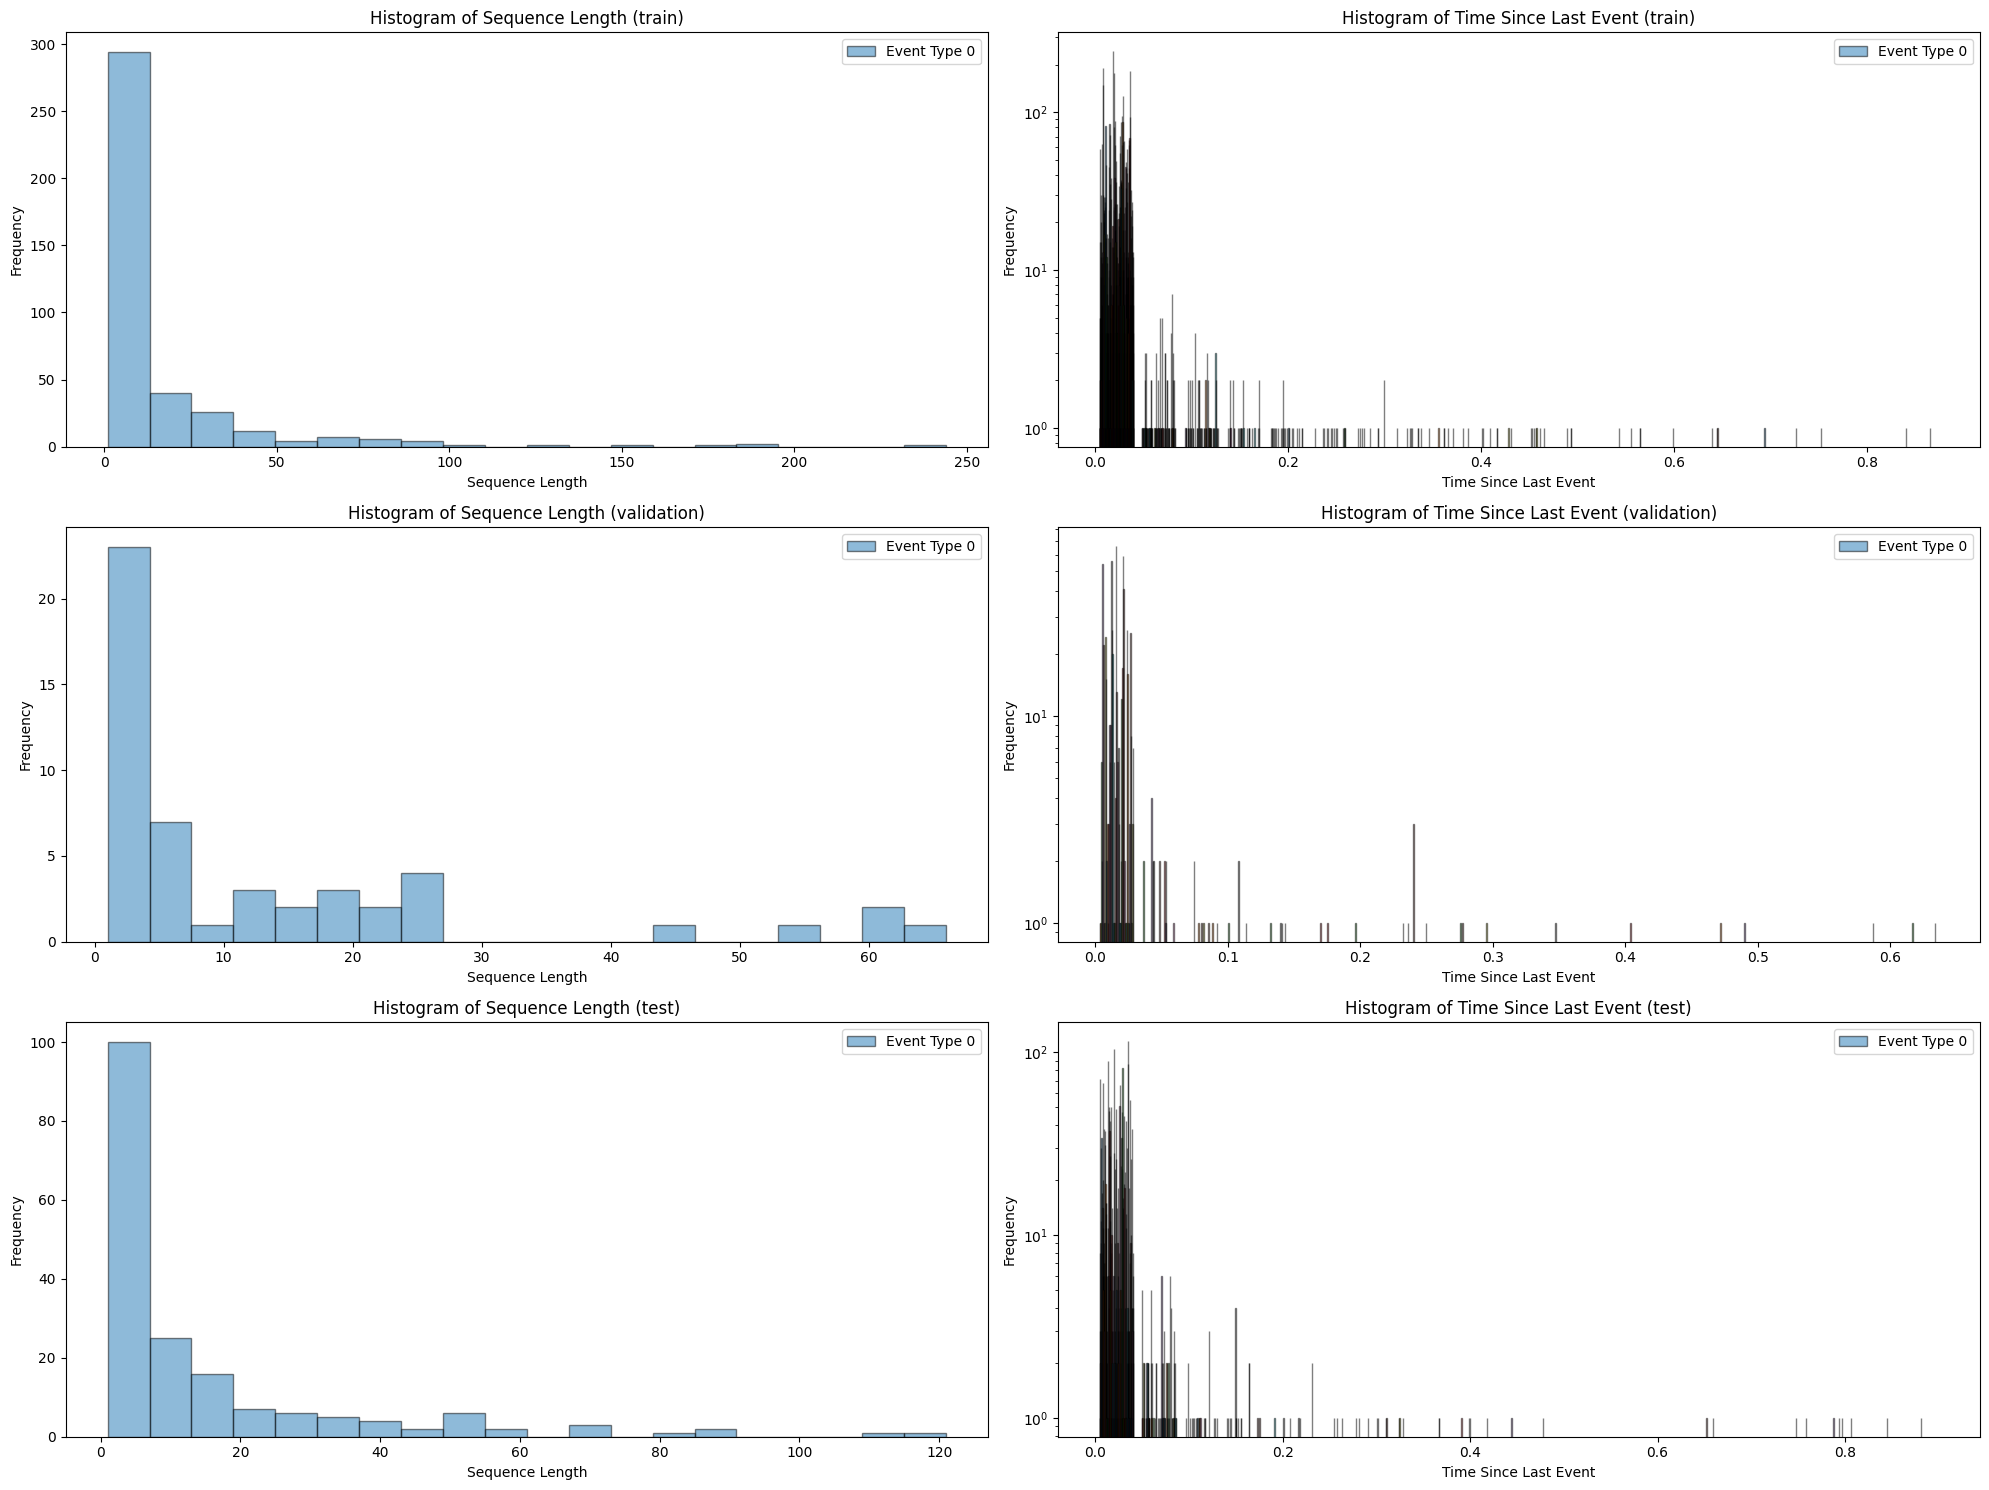

In [16]:
plot_stats_per_event_type(volcano_data)

## Taxi

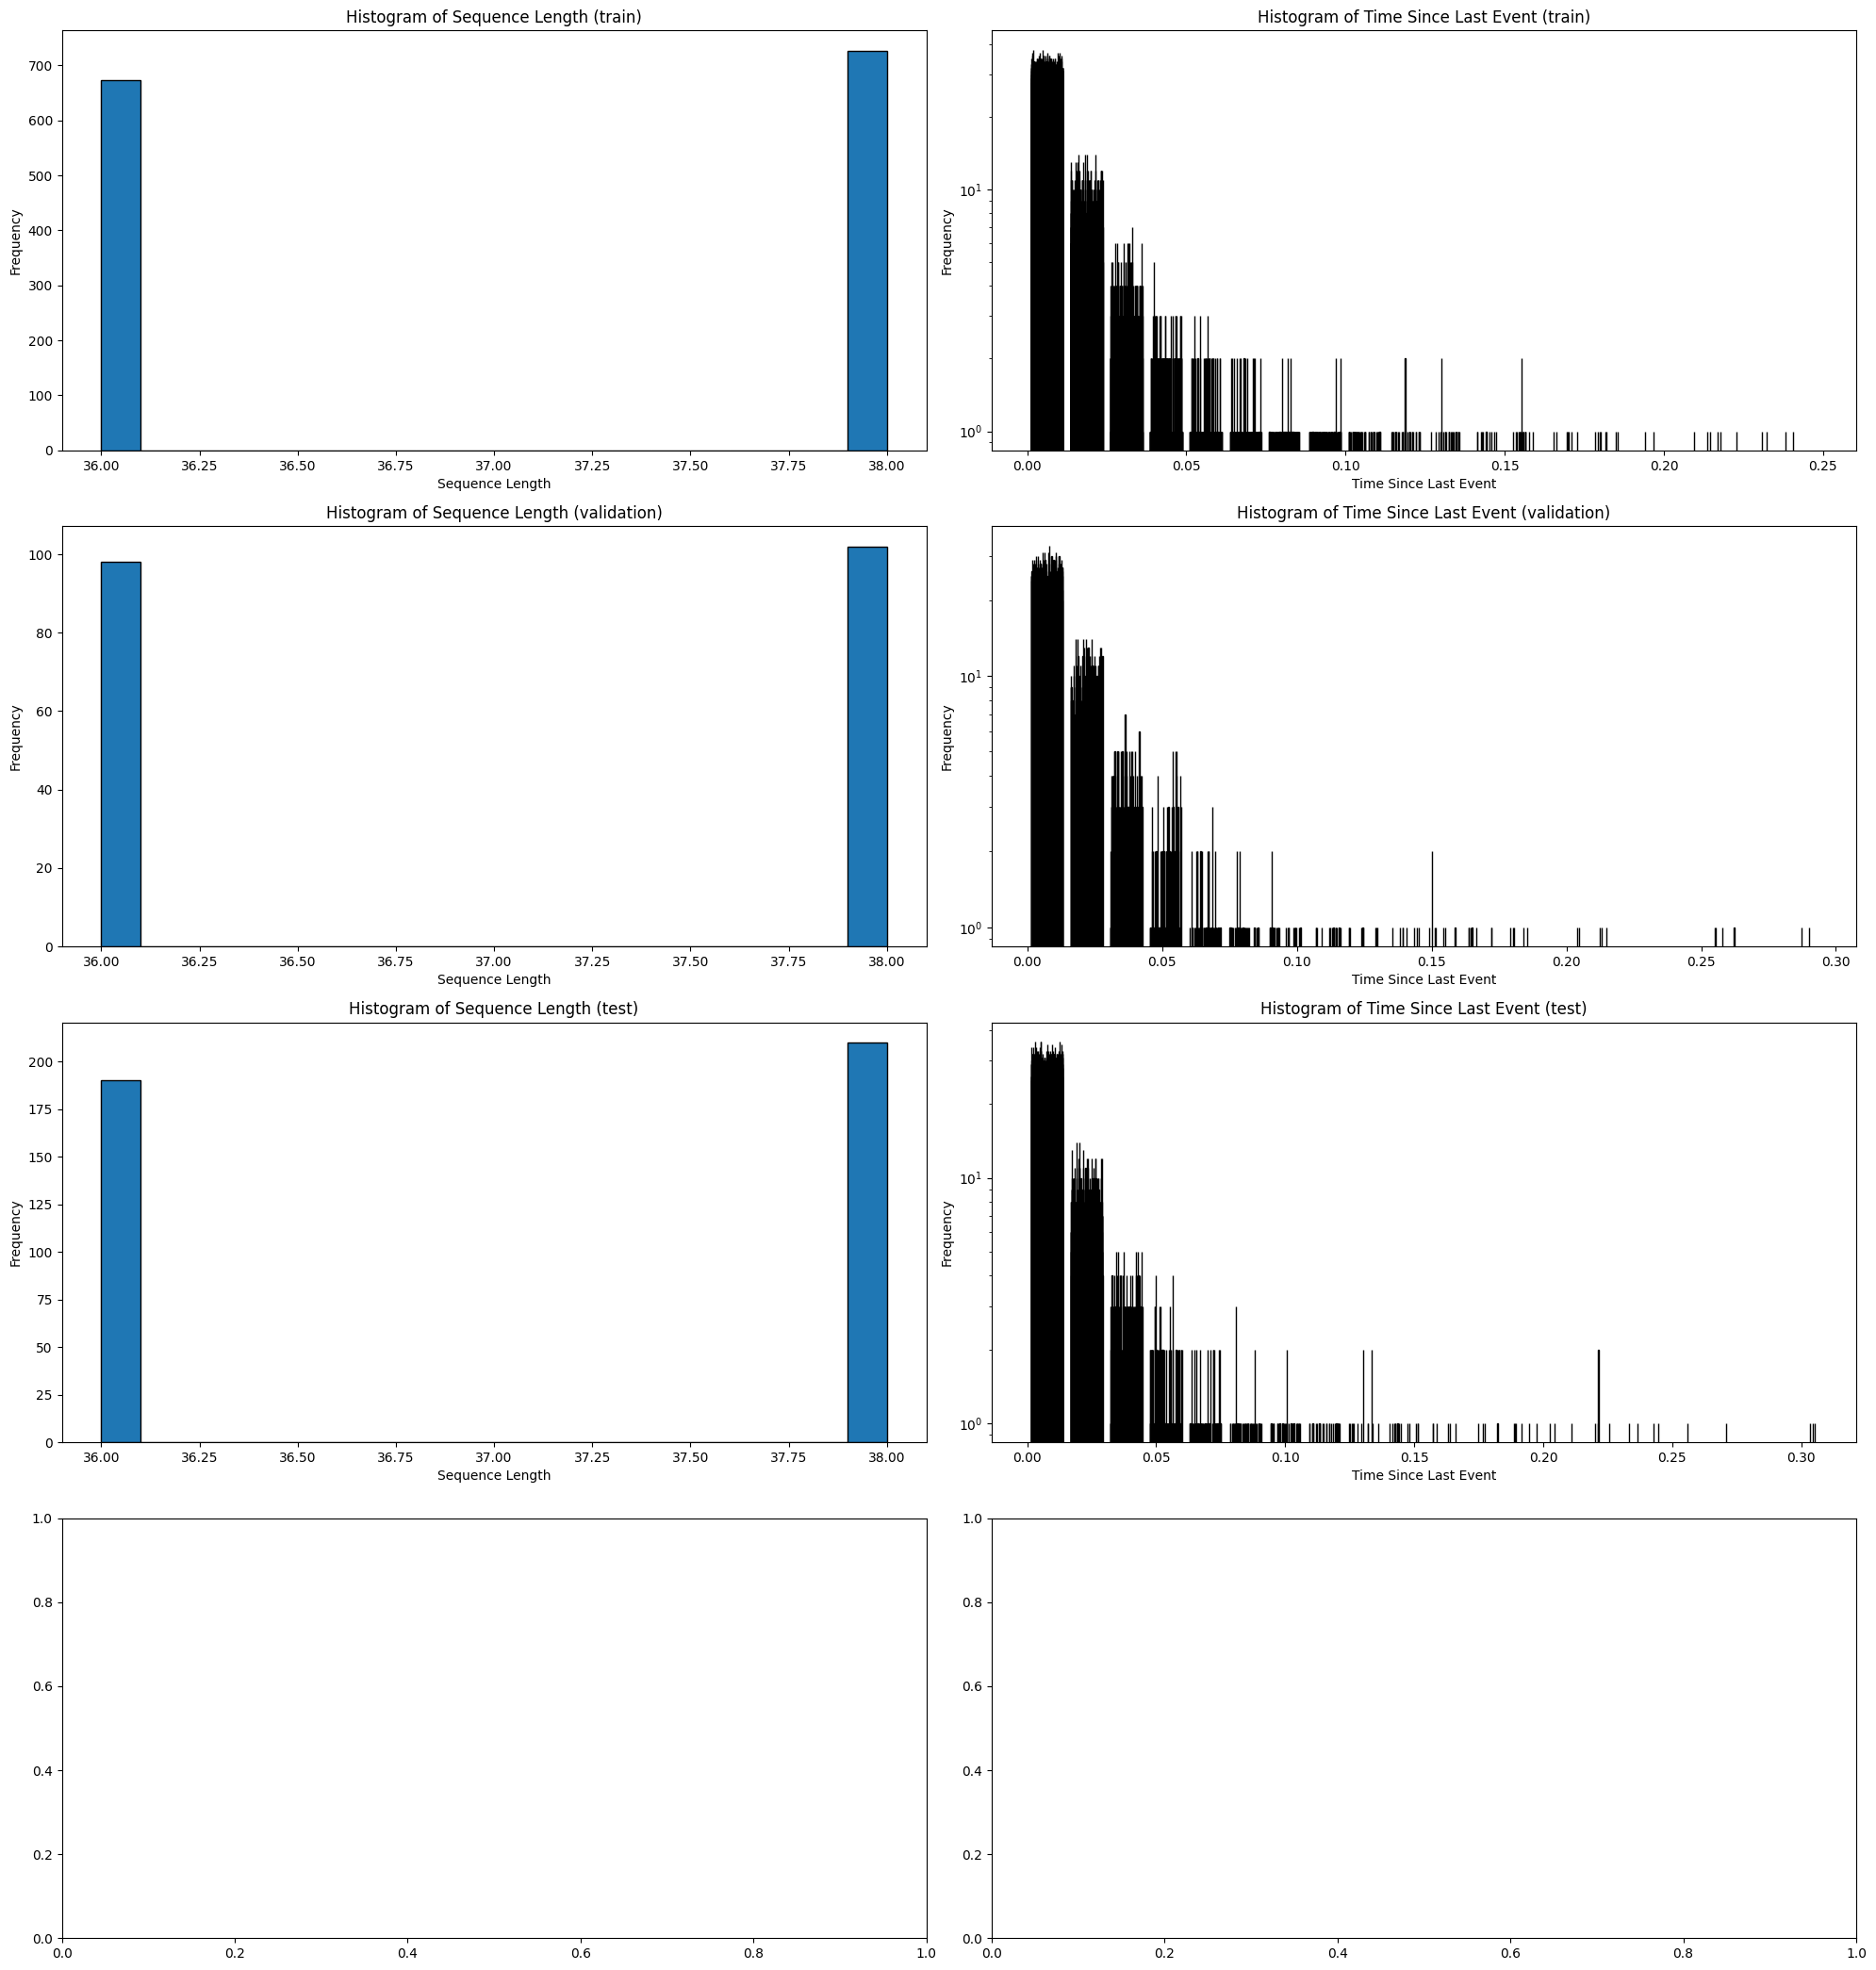

In [17]:
plot_stats(taxi_data)

Event Type 0 for split test
Event Type 1 for split test
Event Type 2 for split test
Event Type 3 for split test
Event Type 4 for split test
Event Type 5 for split test
Event Type 6 for split test
Event Type 7 for split test
Event Type 8 for split test
Event Type 9 for split test


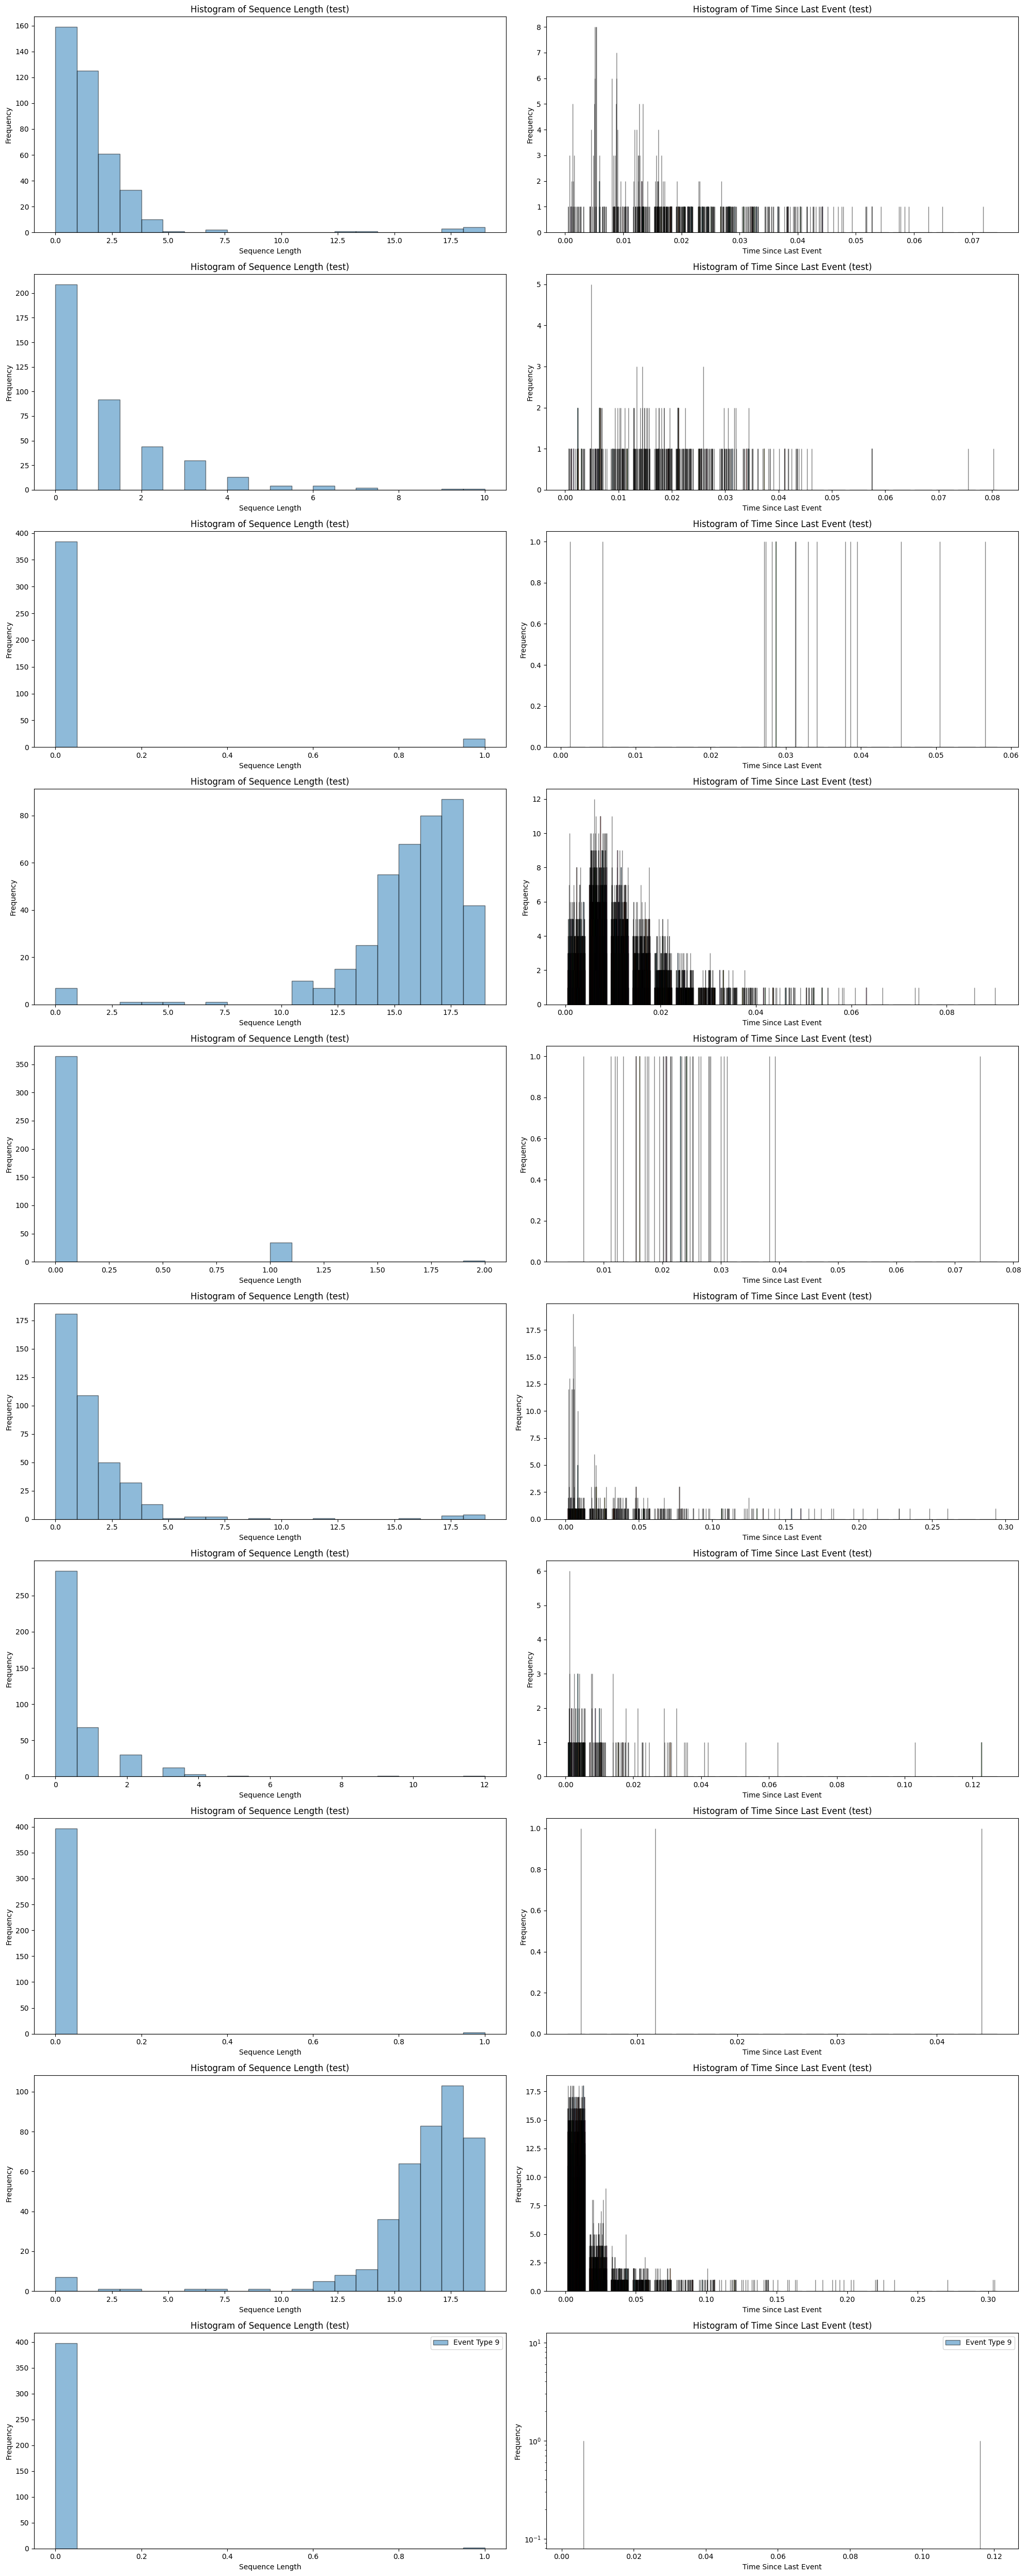

In [18]:
plot_stats_per_event_type(taxi_data, splits=["test"])

## Retweet

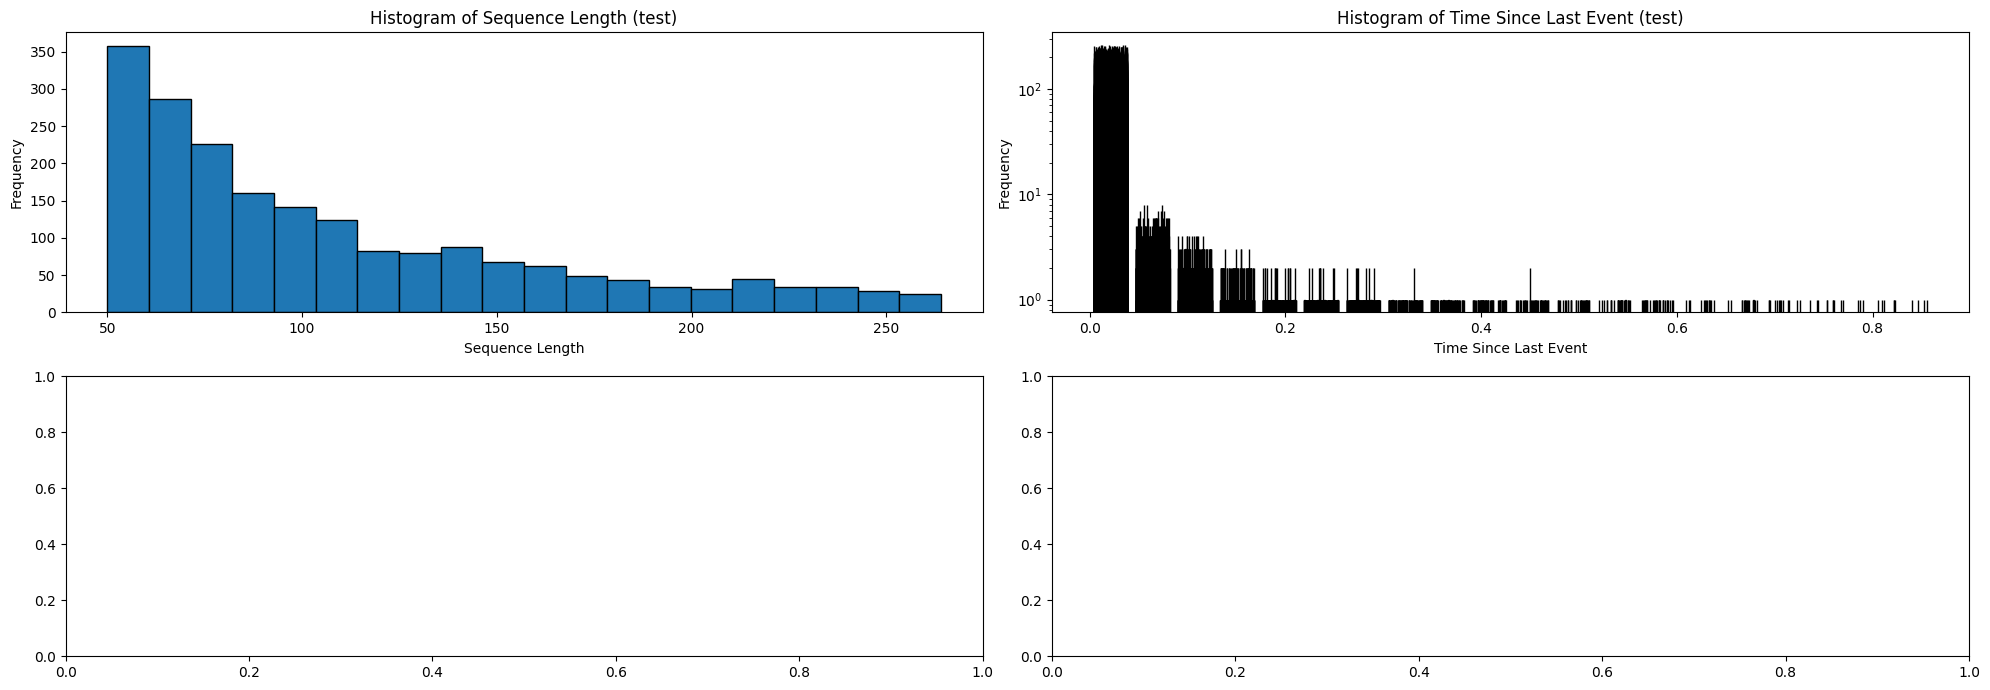

In [19]:
plot_stats(retweet_data, splits=["test"])

Event Type 0 for split test
Event Type 1 for split test
Event Type 2 for split test


/tmp/ipykernel_517103/683559192.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/berghaus/FoundationModels/FIM/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


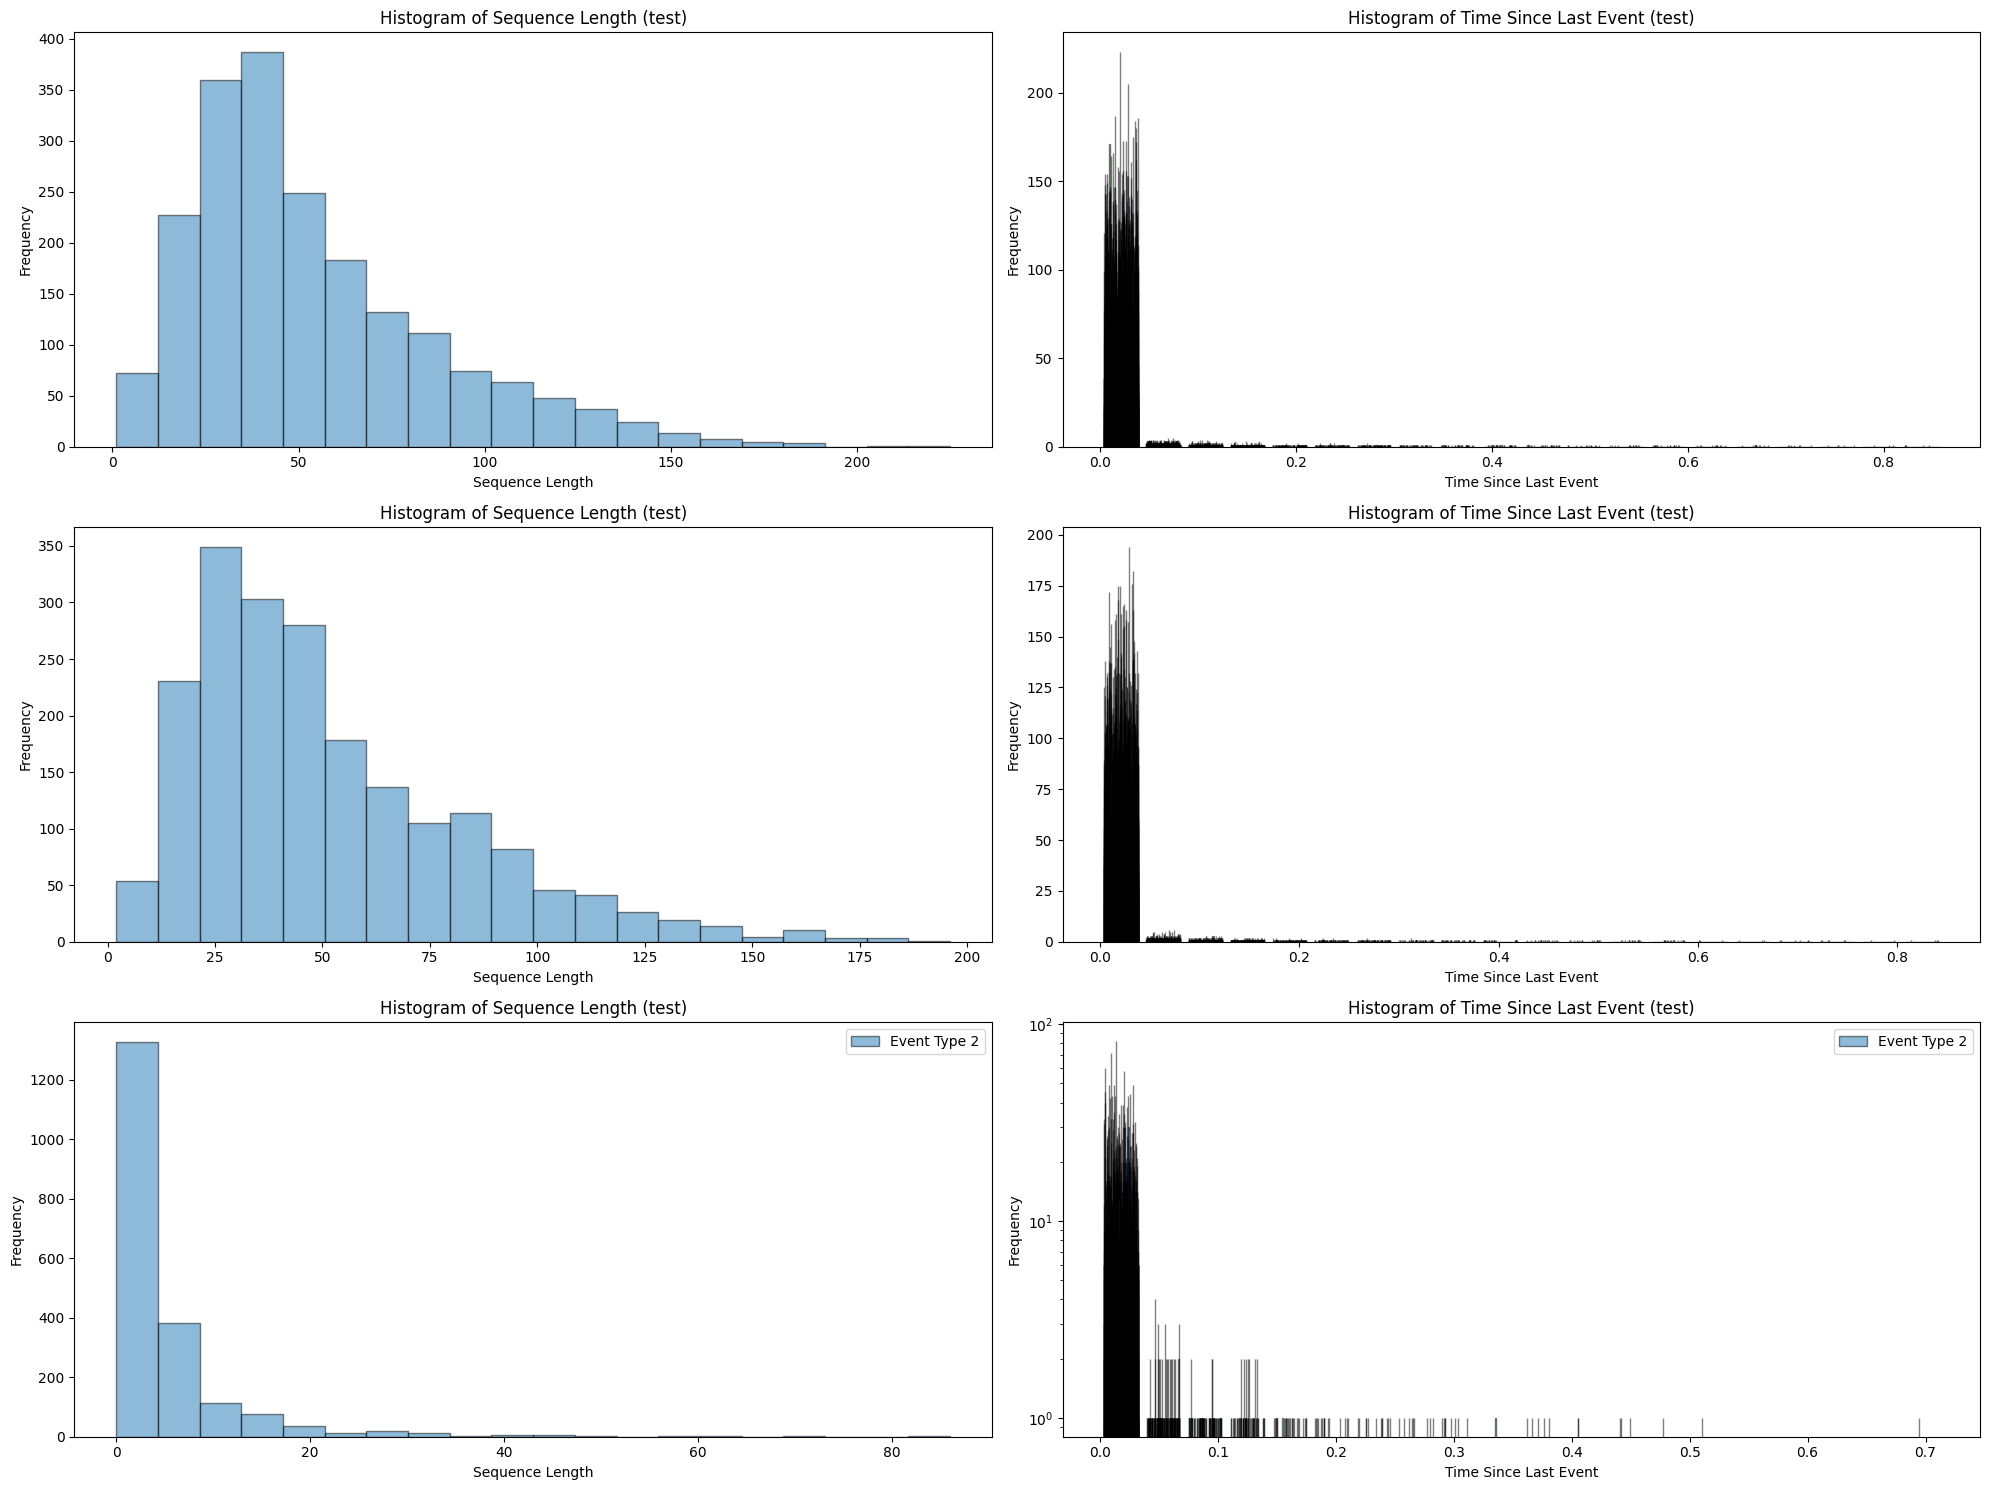

In [20]:
plot_stats_per_event_type(retweet_data, splits=["test"])

## Earthquake

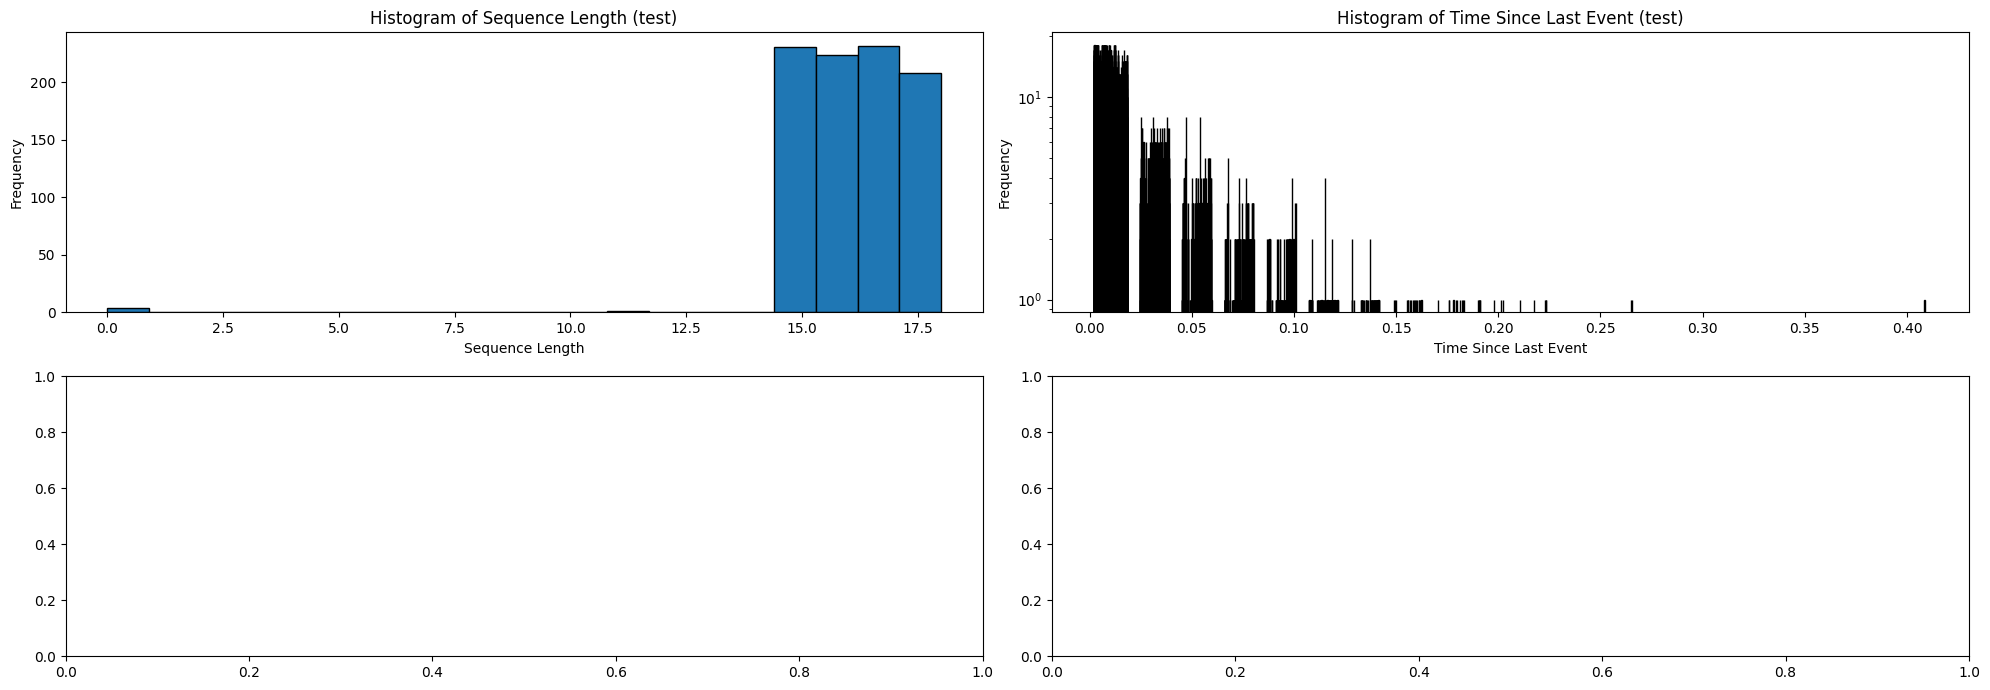

In [21]:
plot_stats(earthquake_data, splits=["test"])

Event Type 0 for split test
Event Type 1 for split test
Event Type 2 for split test
Event Type 3 for split test
Event Type 4 for split test
Event Type 5 for split test
Event Type 6 for split test


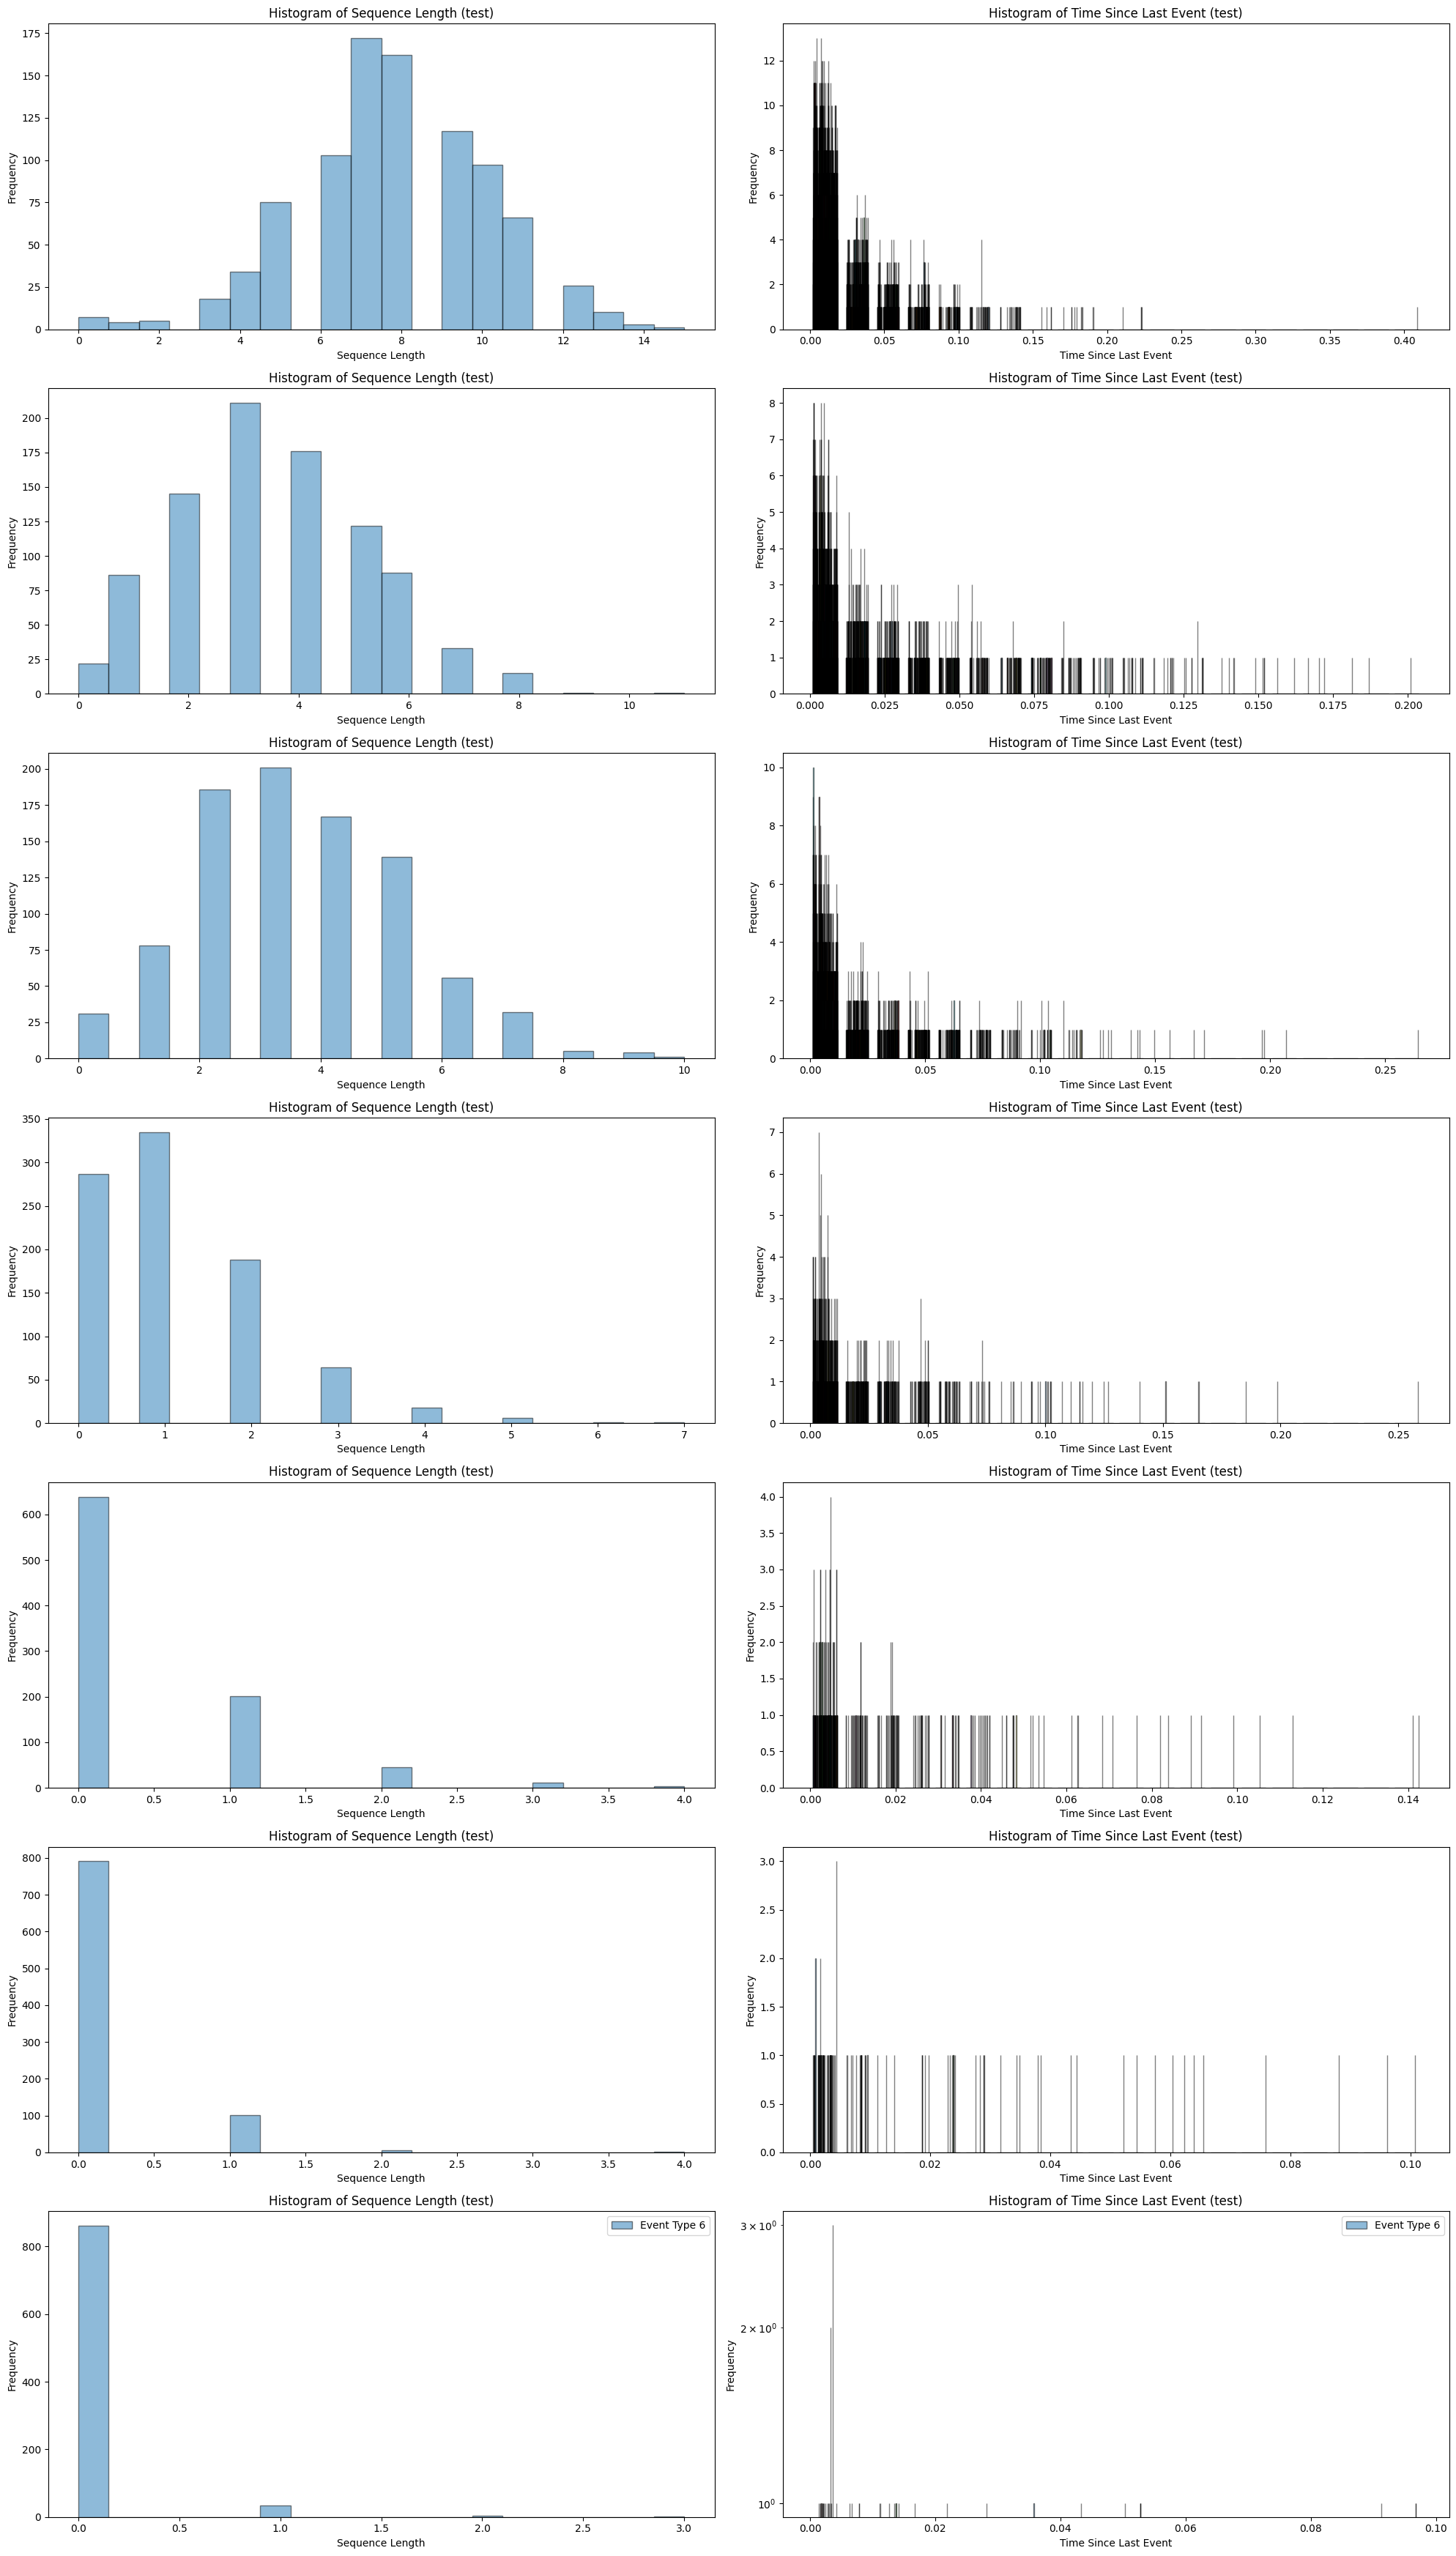

In [22]:
plot_stats_per_event_type(earthquake_data, splits=["test"])

## Amazon

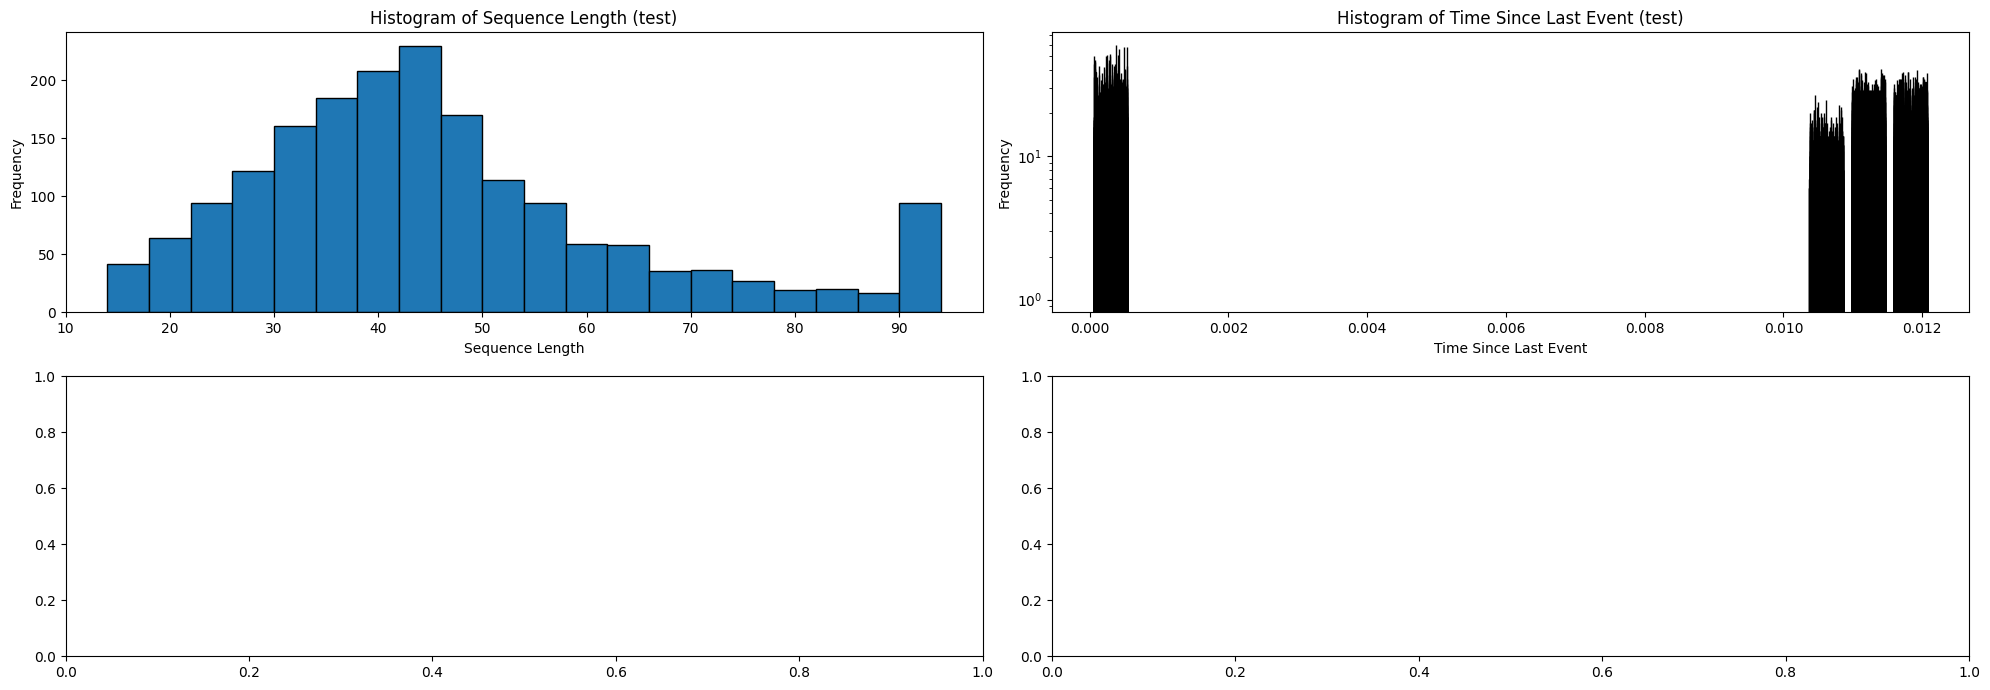

In [23]:
plot_stats(amazon_data, splits=["test"])

Event Type 0 for split test
Event Type 1 for split test
Event Type 2 for split test
Event Type 3 for split test
Event Type 4 for split test
Event Type 5 for split test
Event Type 6 for split test
Event Type 7 for split test
Event Type 8 for split test
Event Type 9 for split test
Event Type 10 for split test
Event Type 11 for split test
Event Type 12 for split test
Event Type 13 for split test
Event Type 14 for split test
Event Type 15 for split test


/tmp/ipykernel_517103/683559192.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


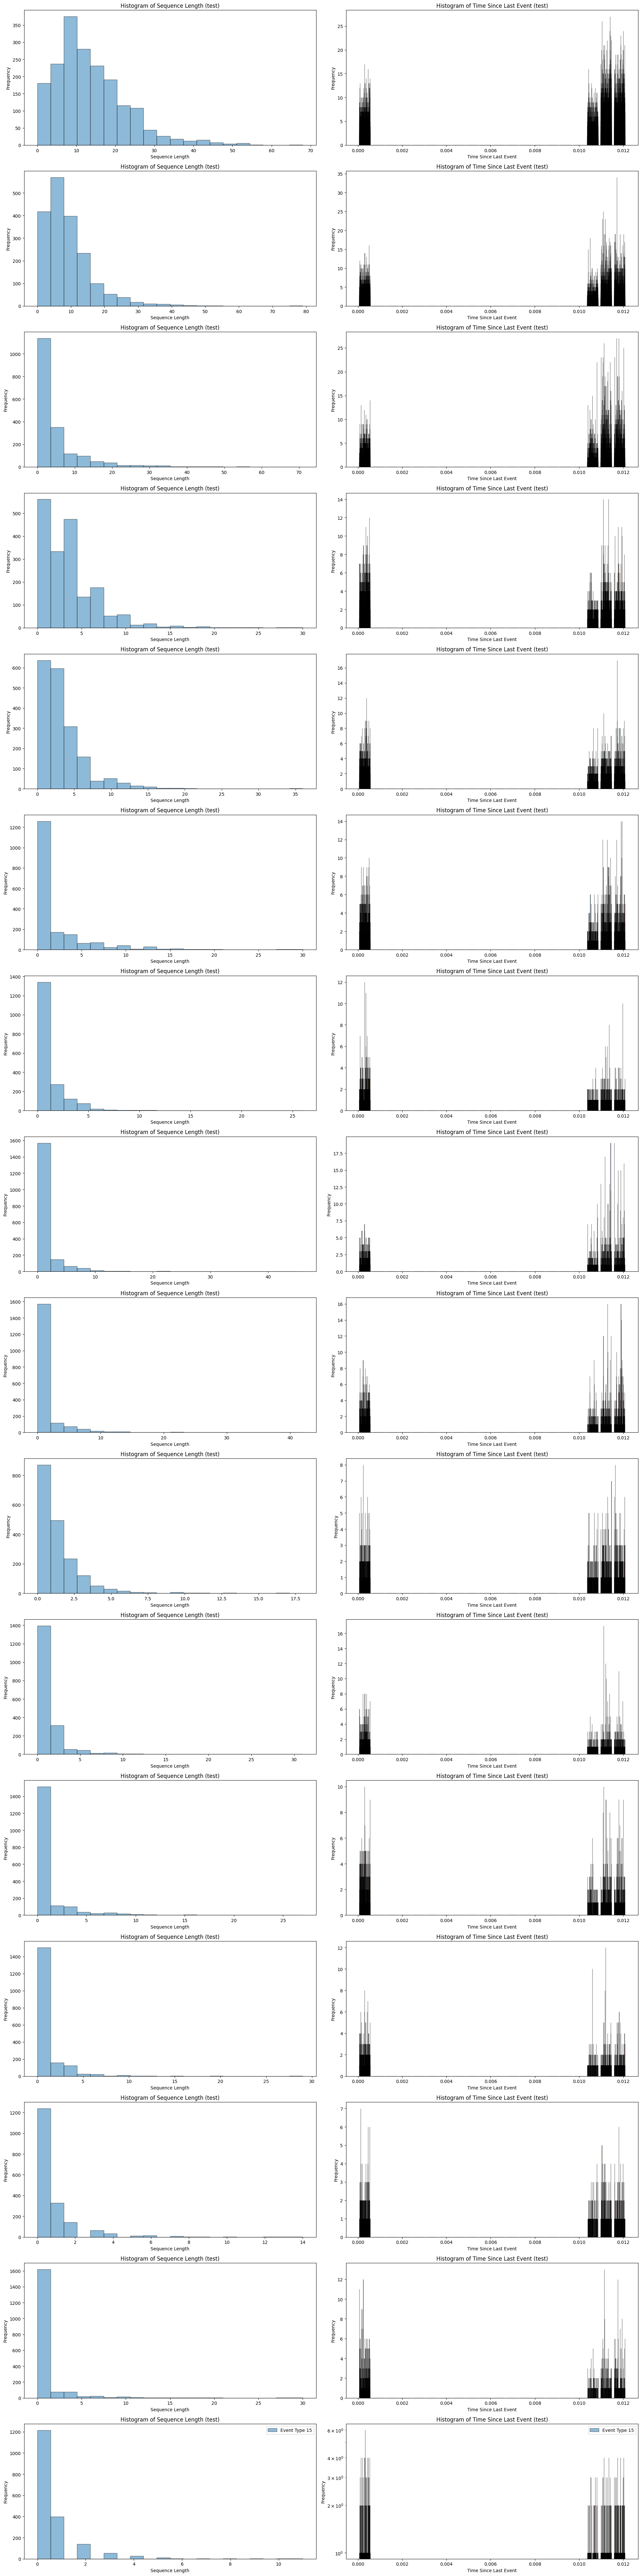

In [24]:
plot_stats_per_event_type(amazon_data, splits=["test"])

## Taobao

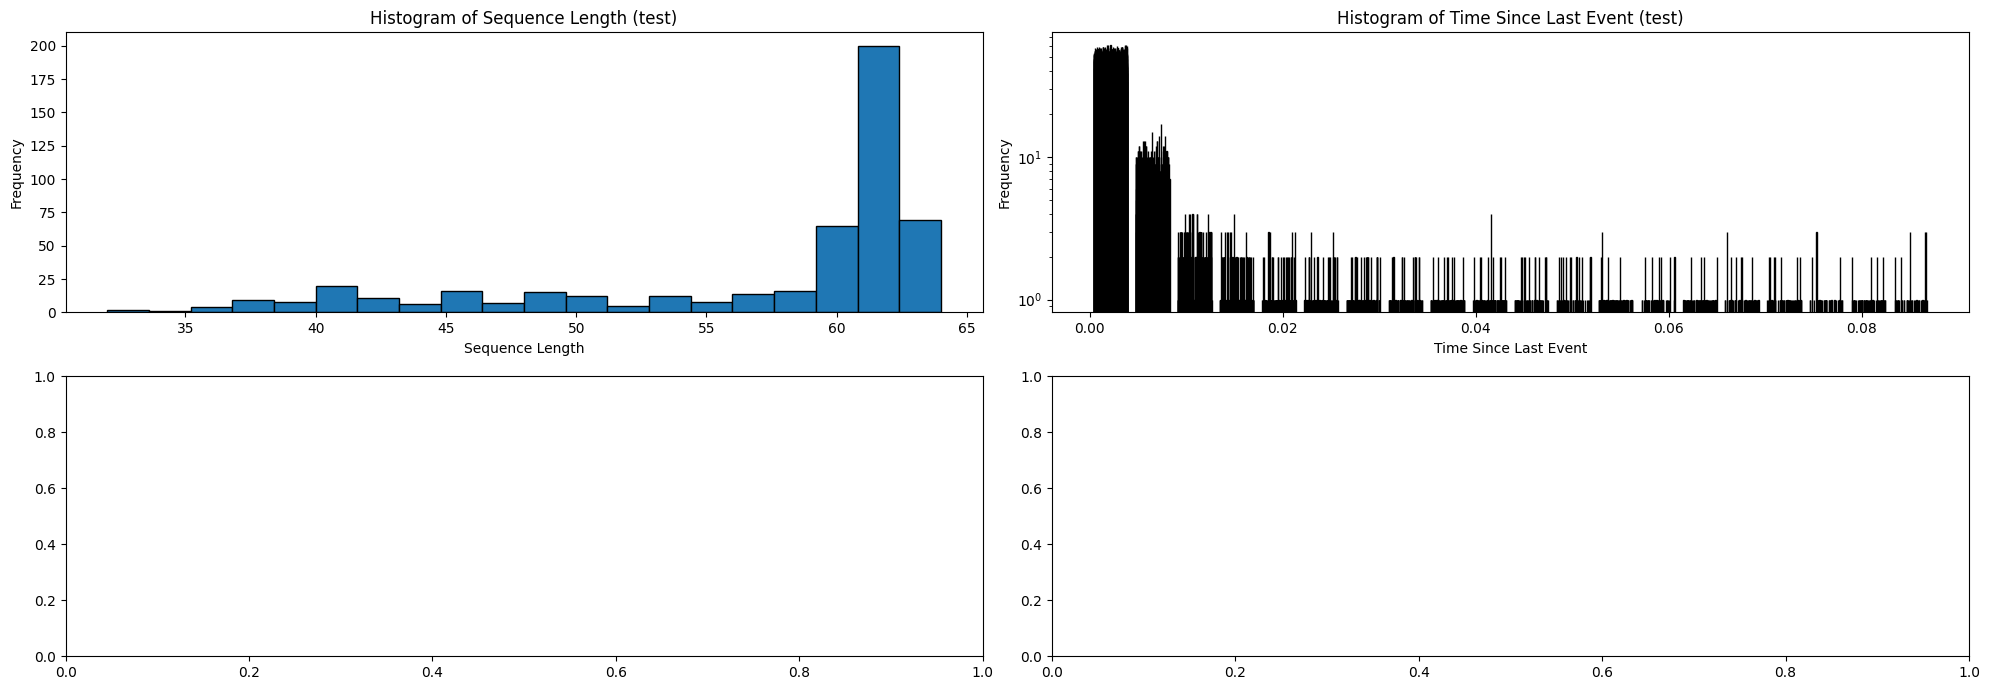

In [25]:
plot_stats(taobao_data, splits=["test"])

Event Type 0 for split test
Event Type 1 for split test
Event Type 2 for split test
Event Type 3 for split test
Event Type 4 for split test
Event Type 5 for split test
Event Type 6 for split test
Event Type 7 for split test
Event Type 8 for split test
Event Type 9 for split test


Event Type 10 for split test
Event Type 11 for split test
Event Type 12 for split test
Event Type 13 for split test
Event Type 14 for split test
Event Type 15 for split test
Event Type 16 for split test


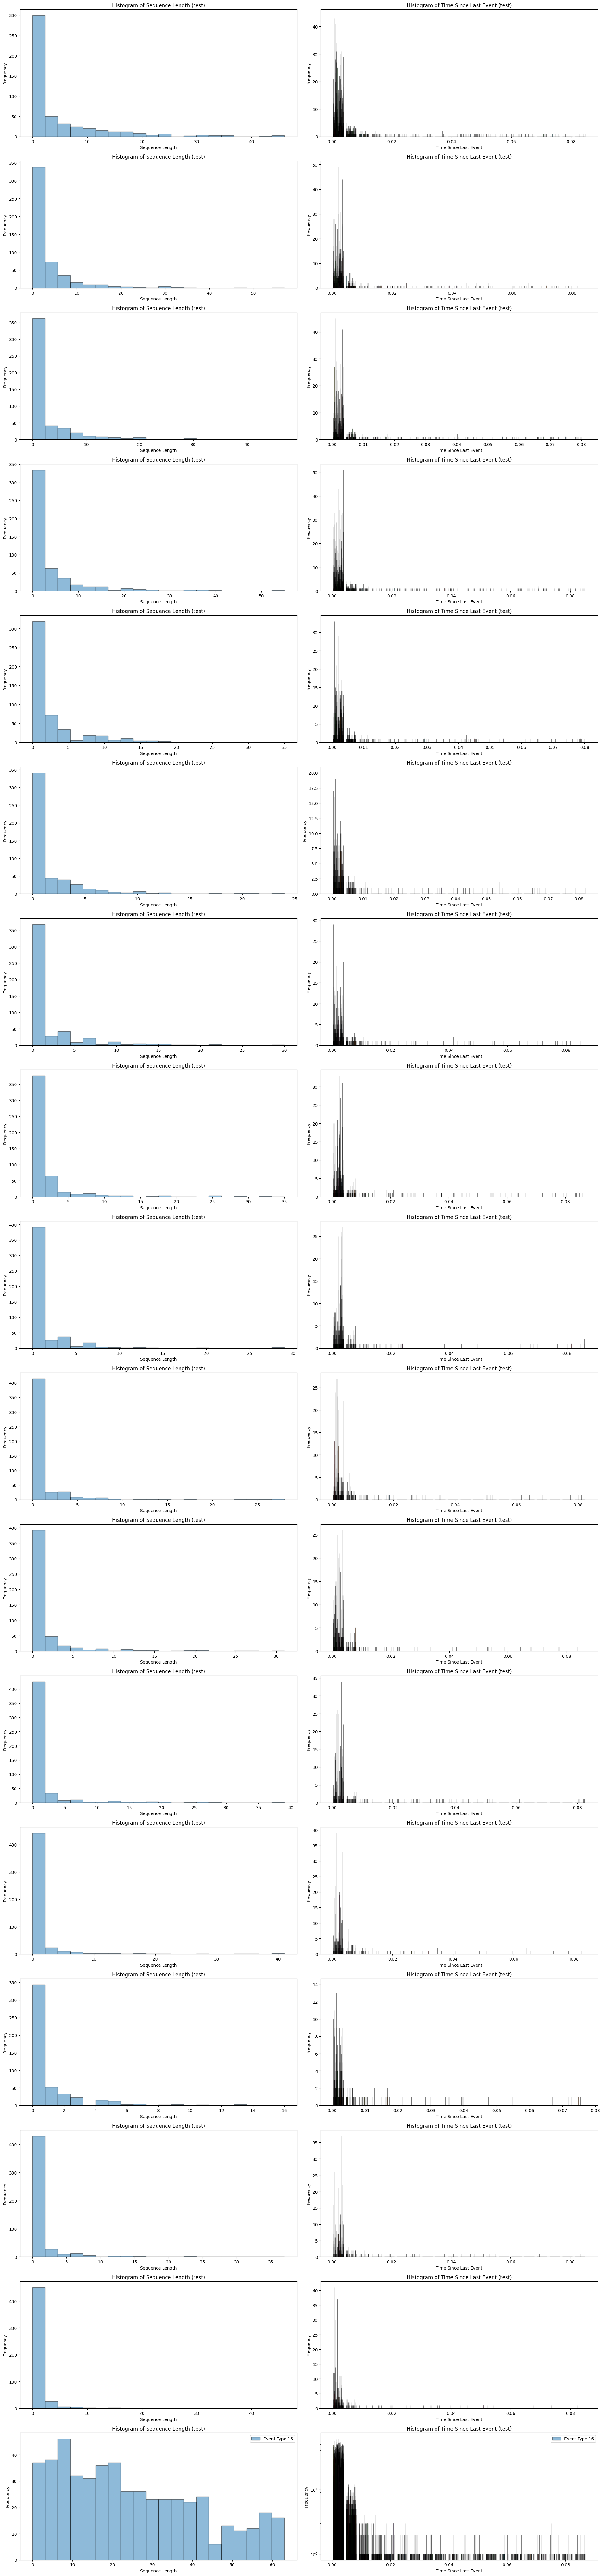

In [26]:
plot_stats_per_event_type(taobao_data, splits=["test"])

## Stackoverflow

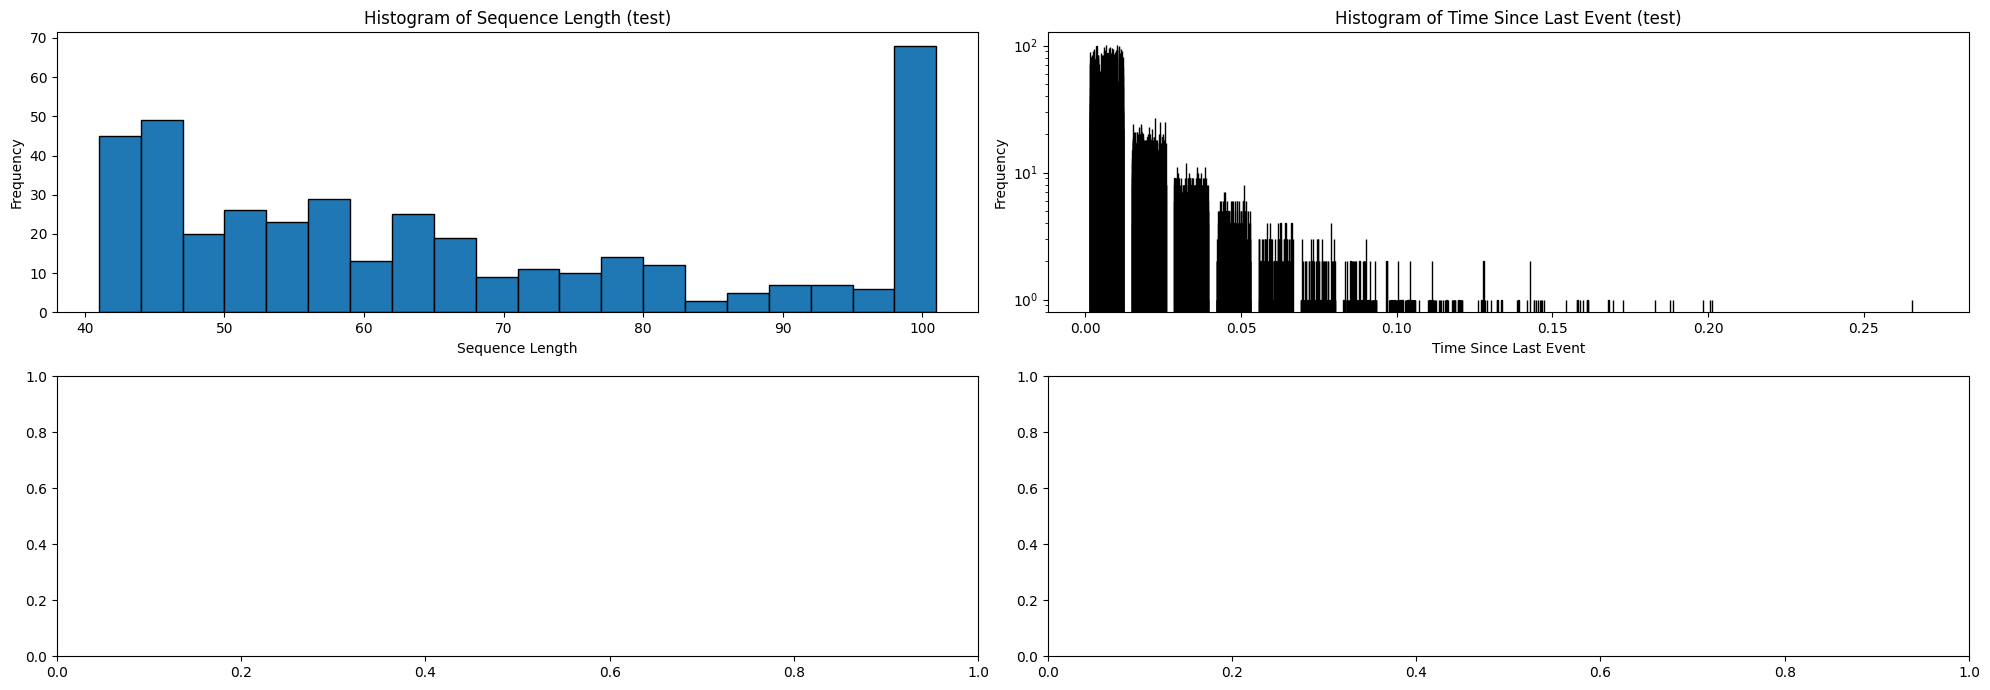

In [27]:
plot_stats(stackoverflow_data, splits=["test"])

Event Type 0 for split test
Event Type 1 for split test
Event Type 2 for split test
Event Type 3 for split test
Event Type 4 for split test
Event Type 5 for split test
Event Type 6 for split test
Event Type 7 for split test


Event Type 8 for split test
Event Type 9 for split test
Event Type 10 for split test
Event Type 11 for split test
Event Type 12 for split test
Event Type 13 for split test
Event Type 14 for split test
Event Type 15 for split test
Event Type 16 for split test
Event Type 17 for split test
Event Type 18 for split test
Event Type 19 for split test
Event Type 20 for split test
Event Type 21 for split test


/tmp/ipykernel_517103/683559192.py:31: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes[i*num_events + event_type, 1].set_yscale('log')


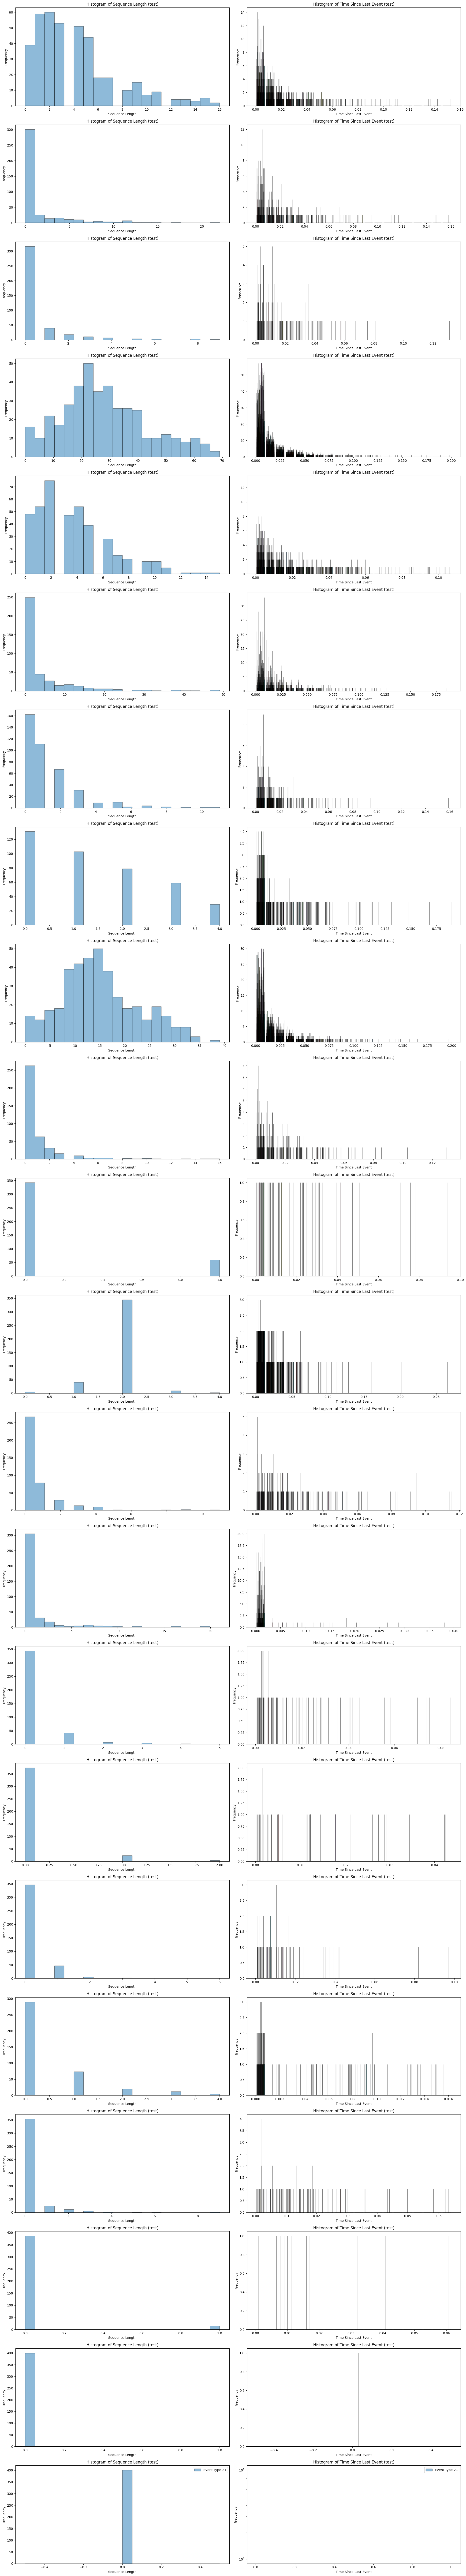

In [28]:
plot_stats_per_event_type(stackoverflow_data, splits=["test"])